In [1]:
from matplotlib import rc
# rc('text', usetex=True)

import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('random-mtsp-knn-ablation.csv')
df = df.drop(labels=['name','KNN_50_30','NI','NN','RI'], axis=1)

cols = df.columns.tolist()

In [150]:
increasing_order = True
if increasing_order:
    reordered_cols = ['KNN_50_1', 'KNN_50_10', 'KNN_50_20', 'Complete', 'FI', 'ORTOOLS']
    algos = [r'$N_r=1$', r'$N_r=10$', r'$N_r=20$','Complete', 'FI', 'OR-tools']
    num_snets = 4
    norm_index = 3
#     comp_times = [0.285, 0.385, 0.483, 1.0, 0.01, 40.99]
    comp_time_real = [14.47, 19.96, 25.04, 51.77, 0.34, 2122.130]
    comp_times = np.array(comp_time_real) / np.array(comp_time_real)[norm_index]
    
else:
    reordered_cols = ['Complete', 'KNN_50_20', 'KNN_50_10', 'KNN_50_1', 'FI', 'ORTOOLS']
    algos = ['Complete', r'$N_r=20$', r'$N_r=10$',r'$N_r=1$', 'FI', 'OR-tools']
    num_snets = 4
    norm_index = 0
    comp_times = [1.0, 0.483, 0.385, 0.285, 0.1, 40.99]
    comp_time_real = [51.77, 25.04, 19.96, 14.47, 0.34, 2122.130]
df = df[reordered_cols]
df = df.iloc[:26,:]

In [151]:
def annotate_label(bar, value, size, offset=3):
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(value),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, offset),  # 3 points vertical offset
                size=size,
                textcoords="offset points",
                ha='center', va='bottom')

In [152]:
df_kw = pd.read_csv('knn_kw-truncated.csv')
df_kw = df_kw.drop(labels=['name'], axis=1)

In [153]:
df_kw.columns

Index(['Complete', 'KNN_10_10', 'KNN_25_10', 'KNN_50_10', 'KNN_75_10',
       'KNN_100_10', 'FI', 'ORTOOLS'],
      dtype='object')

In [154]:
increasing_order_kw = True
num_snets_kw = 4
if increasing_order_kw:
    reordered_cols_kw = ['KNN_10_10', 'KNN_50_10', 'KNN_100_10','Complete', 
                         'FI', 'ORTOOLS']
    algos_kw = [r'$N_t=10$',r'$N_t=50$', r'$N_t=100$','Complete',
                'FI', 'OR-tools']    
    norm_index_kw = 3
    comp_time_real_kw = [10.05, 19.96, 31.03, 51.77, 
                         0.34, 2122.130]
    comp_time_kw = np.array(comp_time_real_kw) / np.array(comp_time_real_kw)[norm_index_kw]
else:
    reordered_cols_kw = ['Complete', 'KNN_50_20', 'KNN_50_10', 'KNN_50_1', 'FI', 'ORTOOLS']
    algos_kw = ['Complete', r'$N_r=20$', r'$N_r=10$',r'$N_r=1$', 'FI', 'OR-tools']    
    norm_index_kw = 0
    comp_times_kw = [1.0, 0.483, 0.385, 0.285, 0.1, 40.99]
    comp_timee_real_kw = [51.77, 25.04, 19.96, 14.47, 0.34, 2122.130]
df_kw = df_kw[reordered_cols_kw]
df_kw = df_kw.iloc[:26,:]

In [155]:
comp_timee_kw

array([2.95588235e+01, 4.06176471e+01, 5.87058824e+01, 7.55000000e+01,
       9.12647059e+01, 1.00000000e+00, 6.24155882e+03])

In [156]:
annote_std = True

# over the n_r
viz_data = df.to_numpy() / df.to_numpy()[:, norm_index].reshape(-1,1)
means  = np.mean(viz_data,axis=0)
stds  = np.std(viz_data,axis=0) if annote_std else None

# over the n_w
viz_data_kw = df_kw.to_numpy() / df_kw.to_numpy()[:, norm_index_kw].reshape(-1,1)
means_kw  = np.mean(viz_data_kw,axis=0)
stds_kw  = np.std(viz_data_kw,axis=0) if annote_std else None

In [157]:
bar_width = 0.1
annote_size = 12
y_min = .9
y_max = 1.92

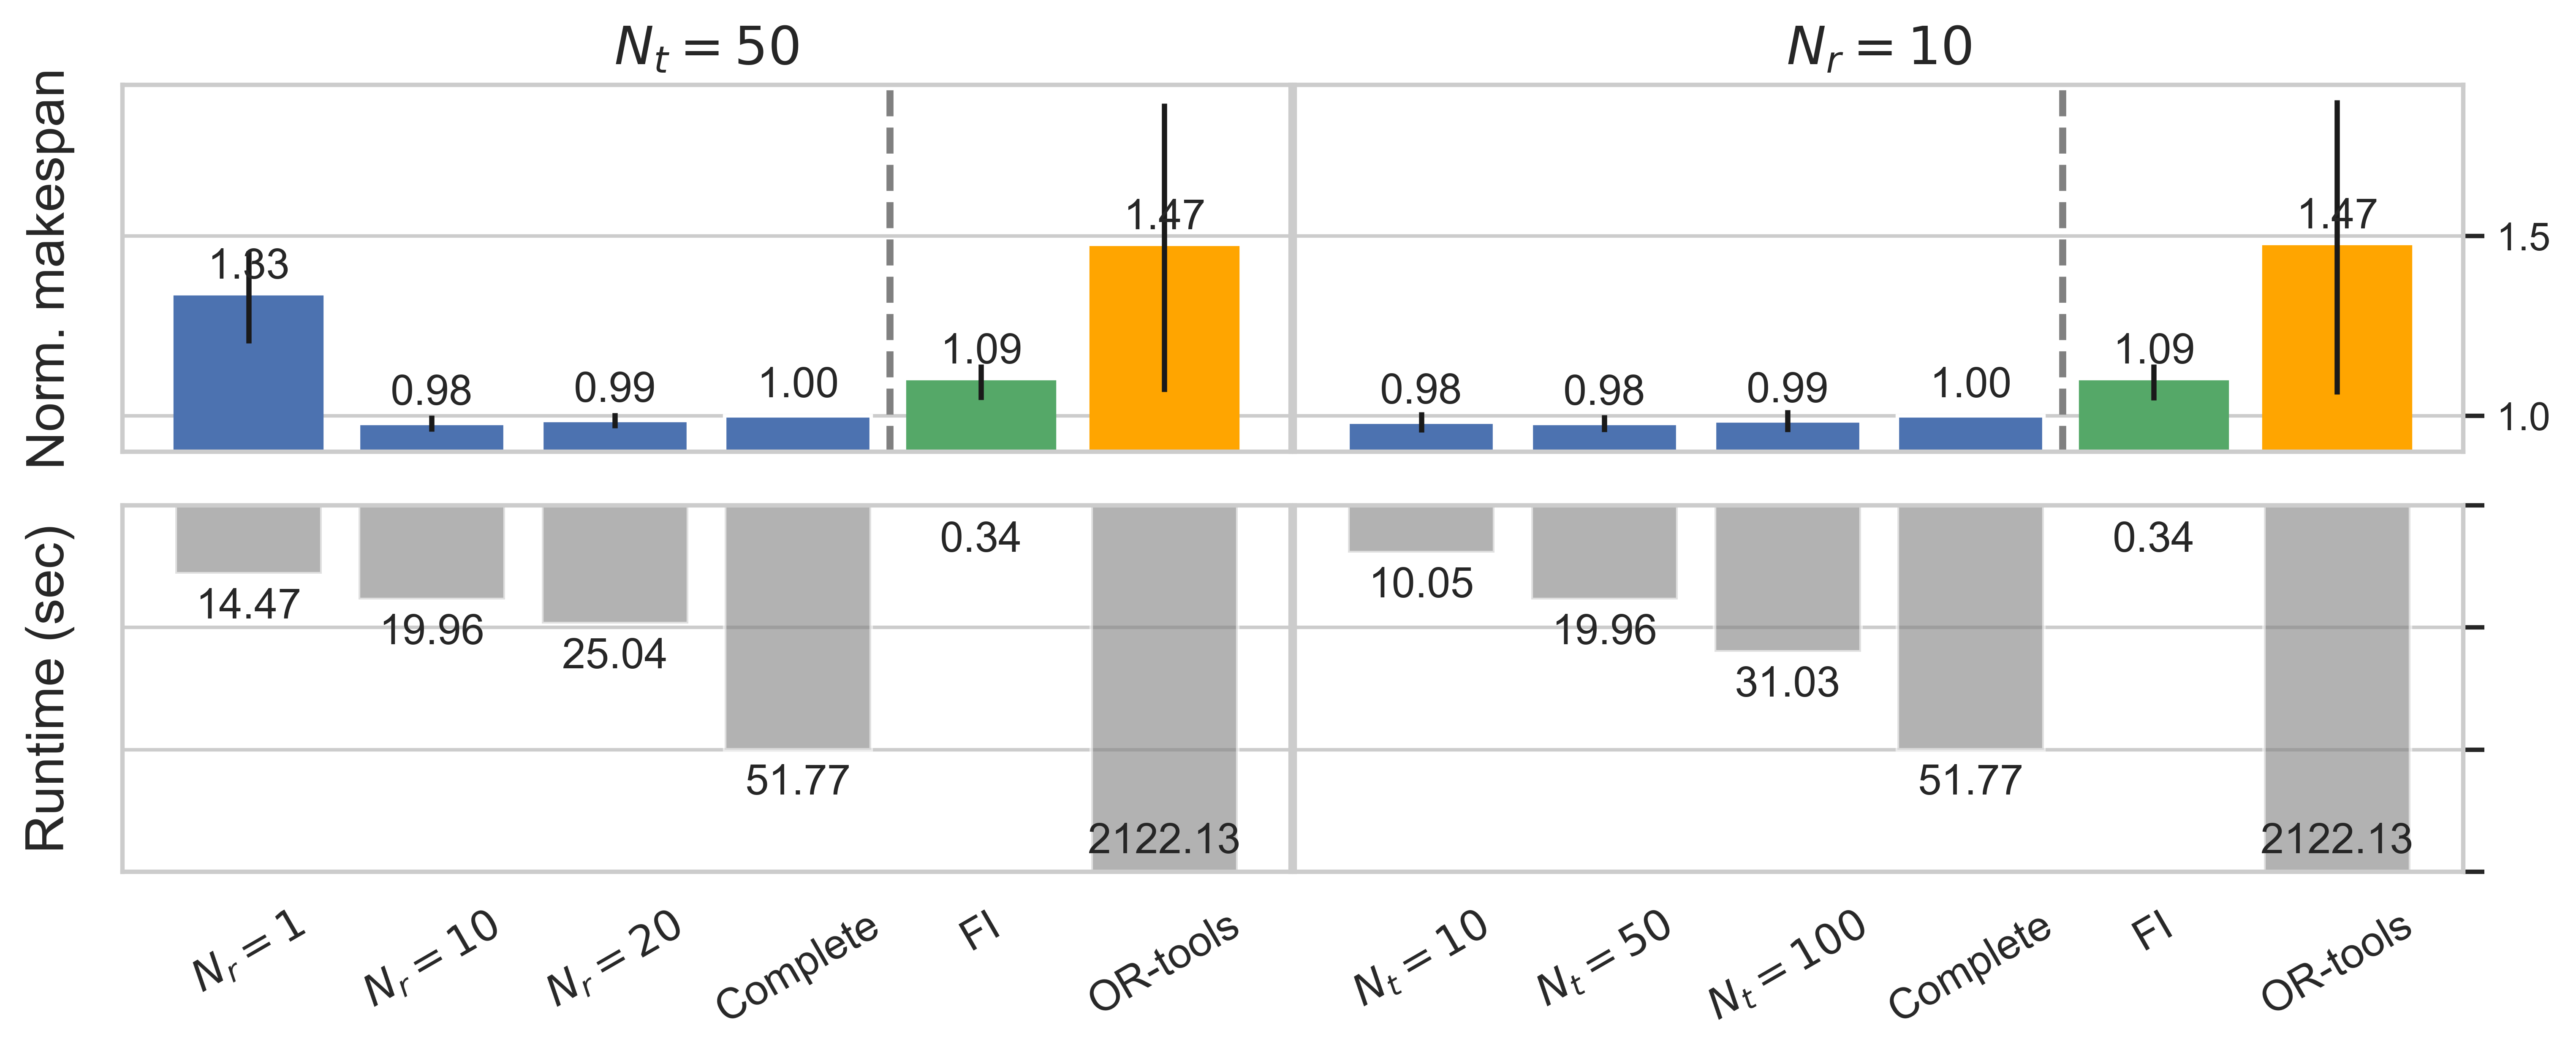

In [158]:
fig, axes = plt.subplots(2,2, figsize=(10,4), dpi=600)
snet_hatchs = ['//', 'x', '/']
title_size = 15
x_label_size = 11
x_tick_size = 12

ax = axes[0,0]
bars = ax.bar(np.arange(len(algos)) + bar_width, means, color='b', yerr=stds)
for i, bar in enumerate(bars):
    
    if i == 0:
        bar.set_color('b')
#     elif 1 <= i <= 3: #snet - sparse
#         bar.set_hatch(snet_hatchs[i-1])        
# #     elif 4 <= i <= 4:
# #         bar.set_color('g')
    elif i == len(algos)-2: # heuristic
        bar.set_color('g')    
    elif i == len(algos)-1: # or-tools
        bar.set_color('orange')

for bar, perf in zip(bars, means):
    annotate_label(bar, perf, annote_size)

    
ax.grid(axis='x')
# ax.grid(False)
ax.axvline(x=num_snets-0.5+bar_width, ls='--', lw=2.0, c='grey', ymax =1.0)
ax.set_xticks([])
ax.set_yticklabels([])
# ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylim(y_min, y_max)
ax.set_ylabel('Norm. makespan', size=title_size)
ax.set_title("$N_t=50$", size=title_size)


ax = axes[1,0]
ax.yaxis.grid(True, which='minor')
# ax.grid(axis='y', zorder=-1.5)

negative_comp_time = -1 * np.array(comp_times).clip(max=1.5)
bars = ax.bar(np.arange(len(algos)) + bar_width, negative_comp_time, color='grey', alpha=0.6)#, yerr=stds)

for bar, perf in zip(bars[:-1], comp_timee_real[:-1]):
    annotate_label(bar, perf, annote_size, offset=-15)

# OR-TOOLS
annotate_label(bars[-1], comp_timee_real[-1], annote_size, offset=3)

ax.set_yticklabels([])
ax.grid(axis='x')
ax.set_xticks(np.arange(len(algos)) + bar_width)
ax.set_xticklabels(algos, rotation=30, size=x_tick_size)
ax.set_ylabel('Runtime (sec)', size=title_size)
ax.set_ylim(-1.5, 0.0)
# ax.set_yticks([])

ax = axes[0,1]
ax.axvline(x=num_snets_kw-0.5+bar_width, ls='--', lw=2.0, c='grey', ymax =1.0)
bars = ax.bar(np.arange(len(reordered_cols_kw)) + bar_width, means_kw, color='b', yerr=stds_kw)
for i, bar in enumerate(bars):
    
    if i == len(reordered_cols_kw)-2:
        bar.set_color('g')
    elif i == len(reordered_cols_kw)-1: # heuristic
        bar.set_color('orange')    
    else:
        pass
    
for bar, perf in zip(bars, means_kw):
    annotate_label(bar, perf, annote_size)

ax.set_xticks([])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylim(y_min, y_max)
ax.set_title("$N_r=10$", size=title_size)

ax = axes[1,1]
negative_comp_time = -1 * np.array(comp_time_kw).clip(max=1.5)
bars = ax.bar(np.arange(len(reordered_cols_kw)) + bar_width, 
              negative_comp_time, color='grey', alpha=0.6)

for bar, perf in zip(bars[:-1], comp_time_real_kw[:-1]):
    annotate_label(bar, perf, annote_size, offset=-15)
    
# OR-TOOLS
annotate_label(bars[-1], comp_time_real_kw[-1], annote_size, offset=3)

ax.grid(axis='x')
ax.yaxis.grid(True, which='minor')
ax.set_yticklabels(np.absolute(ax.get_yticks()))
ax.set_xticks(np.arange(len(algos_kw)) + bar_width)
ax.set_xticklabels(algos_kw, rotation=30, size=x_tick_size)

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_yticklabels([])
ax.set_ylim(-1.5, 0.0)



# # fig.legend(bars, algos, ncol=1, bbox_to_anchor=(0.37, 0.92))    
fig.tight_layout()    
plt.tight_layout(pad=0.1)

In [138]:
len(reordered_cols_kw)

6